In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in data that was sent to RSFS
X = pd.read_csv('allProcessedFeatures.csv')
Xgpa = pd.read_csv('gpaProcessedFeatures.csv')
y_gpa = pd.read_csv('y_gpa.csv', names = ['index', 'gpa'])
y_gpa = y_gpa.iloc[1:, 1] #first row was all 0's, first column was index
y_disc = pd.read_csv('y_disc.csv', names = ['index', 'disc'])
y_disc = y_disc.iloc[1:, 1]#first row was all 0's, first column was index
y_prob = pd.read_csv('y_prob.csv', names = ['index', 'prob'])
y_prob = y_prob.iloc[1:, 1]#first row was all 0's, first column was index
feature_list = list(X.columns.values)
X['disc'] = y_disc.tolist()
X['prob'] = y_prob.tolist()
Xgpa['gpa'] = y_gpa.tolist()
print(Xgpa.shape, y_gpa.shape)
Xgpa
X

(8992, 211) (8992,)


,Unnamed: 0,first_enroll_term,total_course_hours_attempted,first_gen_status,transfer_hours_bt,number_of_logins,total_time_spent_in_content,mid_term_grade,content_completion_rate,points_vs_median,...,veteran_indicator_5,veteran_indicator_6,veteran_indicator_8,veteran_indicator_9,veteran_indicator_H,veteran_indicator_L,veteran_indicator_None,veteran_indicator_V,disc,prob
0,0,0.248333,-0.152899,-0.584711,2.142919,0.214157,0.117975,0.000000,1.058914,1.312289,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
1,1,-0.046796,0.615095,1.710248,-0.641139,-0.212144,0.259695,-0.501803,1.349630,-0.536635,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
2,2,0.248333,-1.688887,1.710248,-0.930392,-0.123175,1.529364,-0.168817,0.815605,0.558667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
3,3,-0.120579,0.615095,-0.584711,-0.279573,0.192851,-0.592194,1.163130,-1.482307,-0.400001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
4,4,0.654136,0.615095,1.710248,1.239004,-0.752073,0.484286,1.163130,0.609495,1.165790,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9356,9356,0.617245,-1.688887,-0.584711,-0.930392,-0.999055,-0.117099,0.000000,-1.865024,-3.981852,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
9357,9357,0.248333,-0.152899,-0.584711,-0.641139,-0.119230,0.006976,0.330663,-1.086631,-0.099557,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
9358,9358,0.654136,0.615095,1.710248,-0.388043,-0.993137,-0.404088,0.746896,-0.413760,0.444307,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
9359,9359,0.617245,-1.688887,1.710248,-0.930392,-0.679477,-0.347865,0.372287,0.828263,-1.019891,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


In [3]:
#extract the indices that RSFS gave as output
disc_indices = [0,1,3,5,10,18,23,27,30,33,34,49,61,68,73,75,136,140,154,189]
prob_indices = [1,6,7,9,10,14,15,16,18,19,22,25,33,49,67,93,117,133,139,187]
gpa_indices = [3,6,7,9,10,17,18,19,22,67,80,117,181,185,186,187,188,189,190,195]

print('-----DISCONTINUE FEATURES-----')
for i in disc_indices:
    print(feature_list[i])
    
print('\n-----PROBATION FEATURES-----')
for i in prob_indices:
    print(feature_list[i])
    
print('\n-----SEMESTER GPA FEATURES-----')
for i in gpa_indices:
    print(feature_list[i])

-----DISCONTINUE FEATURES-----
Unnamed: 0
first_enroll_term
first_gen_status
number_of_logins
points
hs_percentile
fathers_highest_ed_lvl
hall_name_Griffith
hall_name_Kerr
hall_name_Lumberjack Village
hall_name_Off_Campus
meal_plan_All Access Premium
TSI_EV
race_ethnicity_Black or African American
race_ethnicity_White
admit_code_EC
major_bt_FNTD
major_bt_GBUS
major_bt_ITEC
college_bt_FR

-----PROBATION FEATURES-----
first_enroll_term
total_time_spent_in_content
mid_term_grade
points_vs_median
points
hs_sfa_gap
distance
content_topic_visits
hs_percentile
total_sfa_hours_bt
ACT
in_state_res_indicator
hall_name_Lumberjack Village
meal_plan_All Access Premium
race_ethnicity_Asian
admit_code_S
major_bt_COMS
major_bt_EVSC
major_bt_FRWM
college_bt_ED

-----SEMESTER GPA FEATURES-----
first_gen_status
total_time_spent_in_content
mid_term_grade
points_vs_median
points
mothers_highest_ed_lvl
hs_percentile
total_sfa_hours_bt
ACT
race_ethnicity_Asian
admit_code_FH
major_bt_COMS
major_bt_SUDE
major_

**Remove features which had a lot of missing values to begin with since that means most values were imputed**

**Remove features which do not seem to correlate to the class it is predicting**

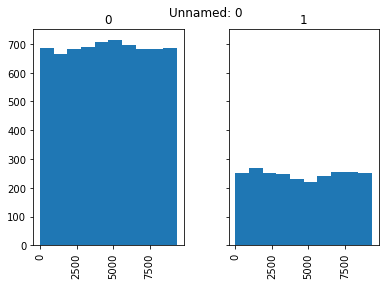

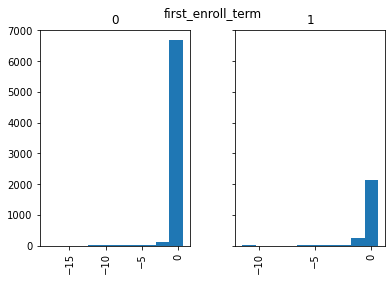

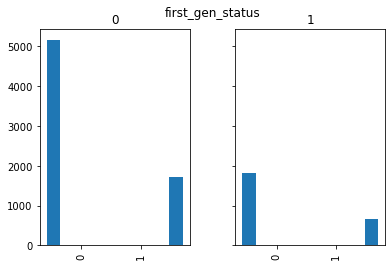

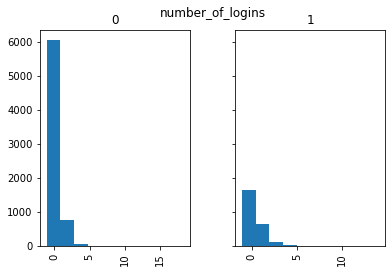

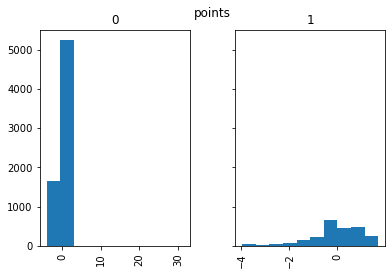

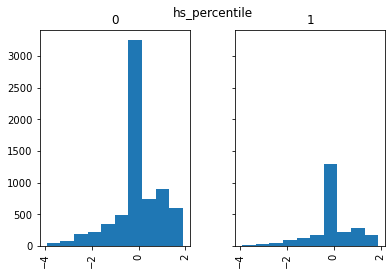

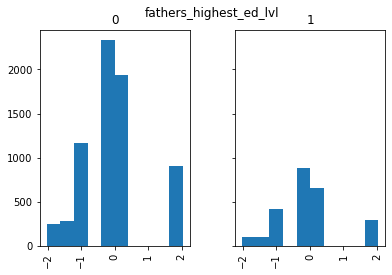

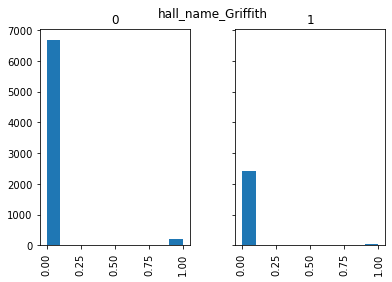

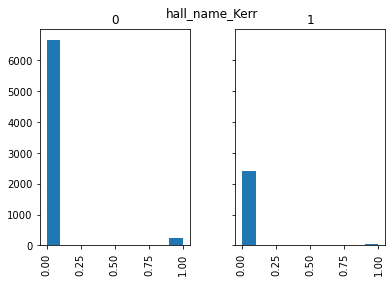

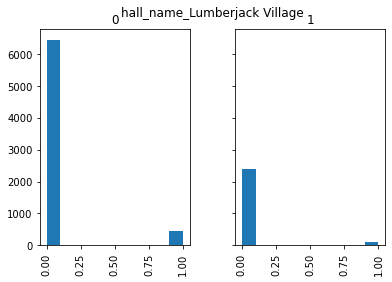

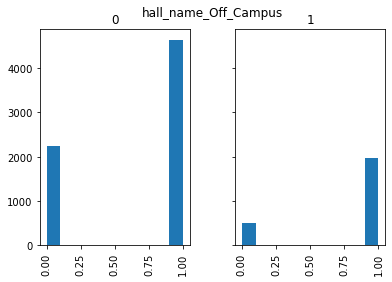

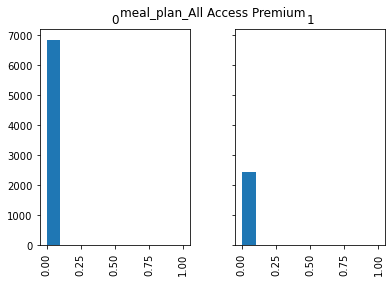

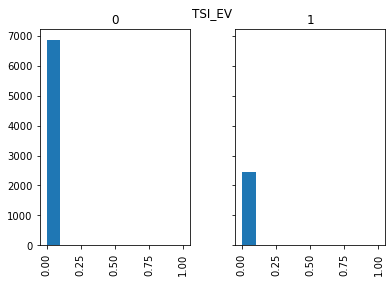

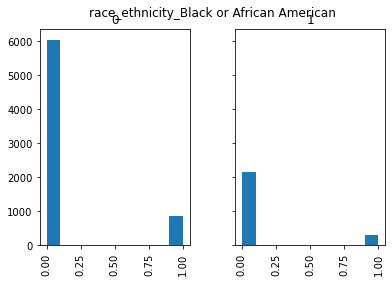

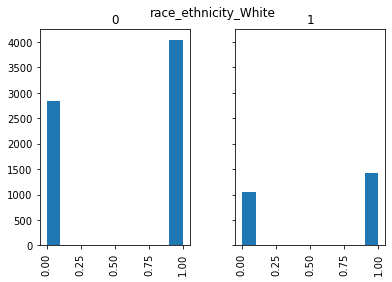

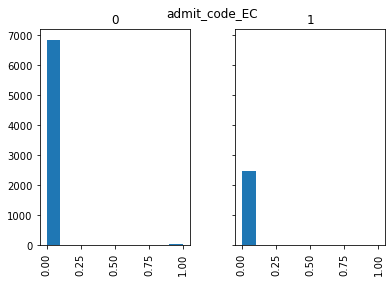

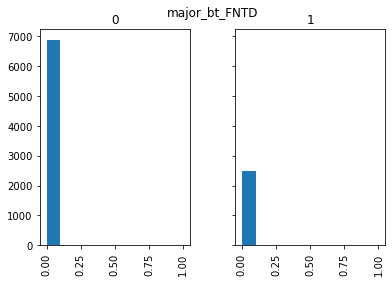

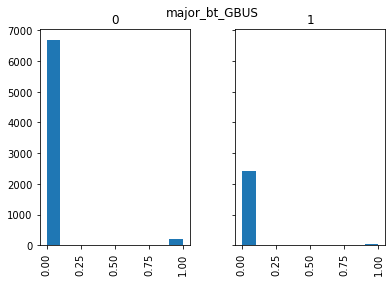

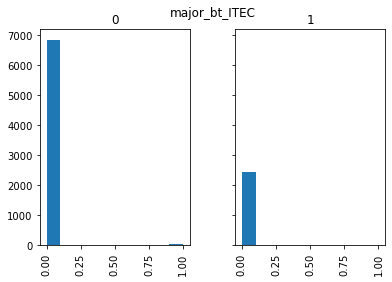

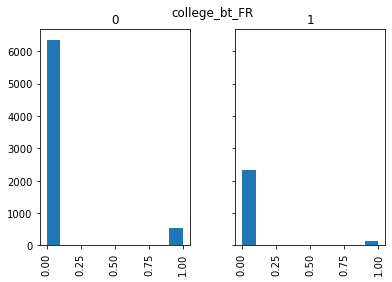

In [101]:
for i in disc_indices:
    X.hist(column = feature_list[i], by = 'disc', sharey = True)
    plt.suptitle(feature_list[i])
    filename = 'disc_' + feature_list[i] + '.png'
    plt.savefig(filename)

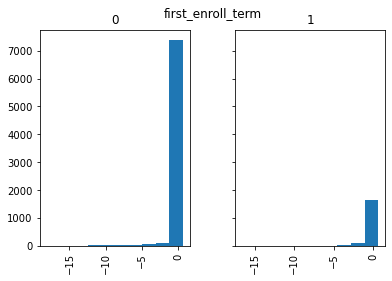

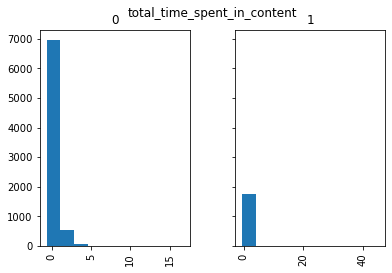

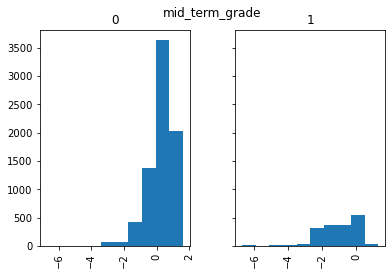

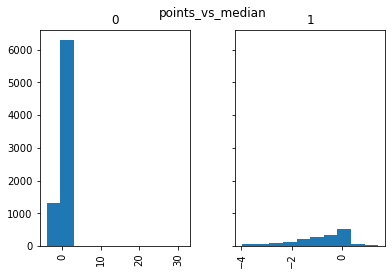

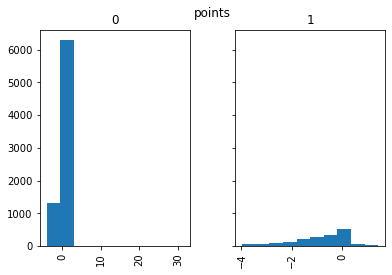

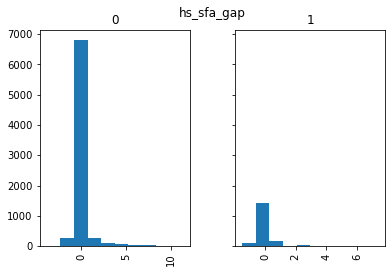

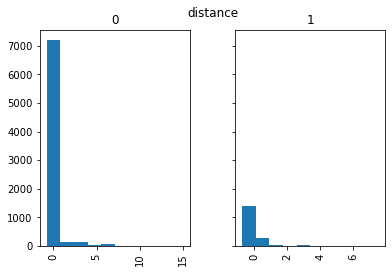

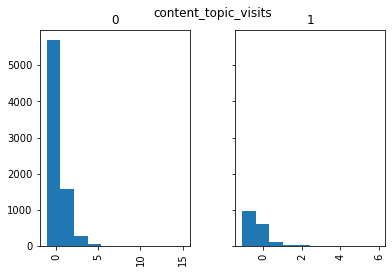

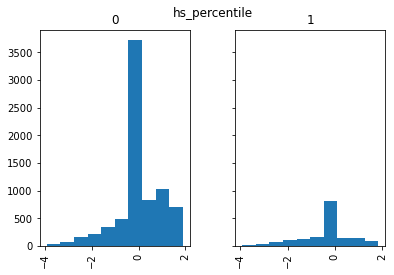

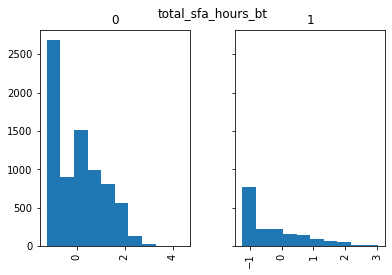

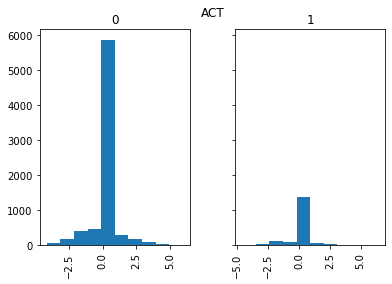

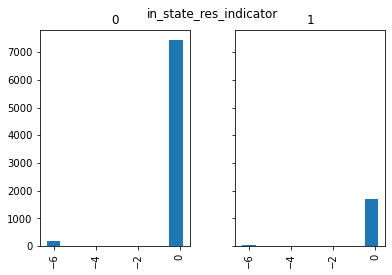

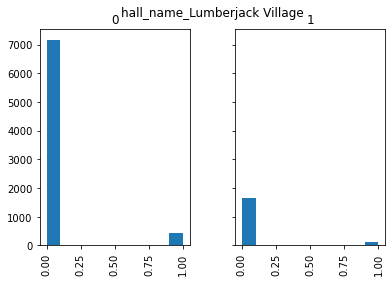

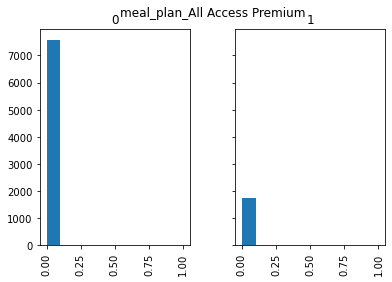

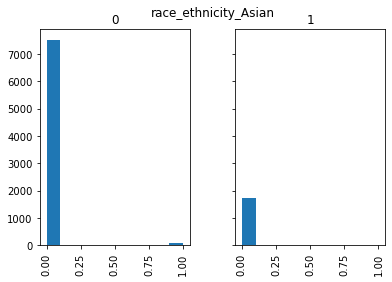

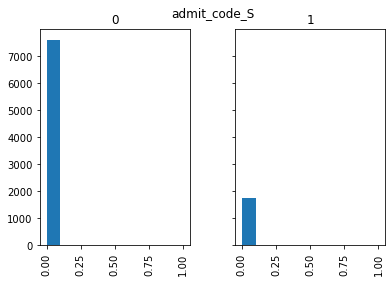

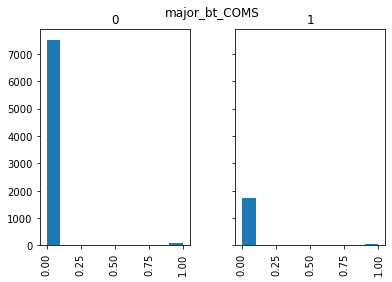

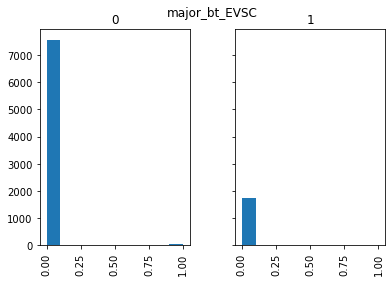

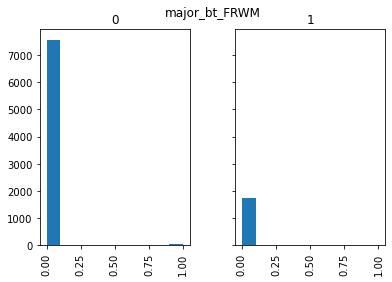

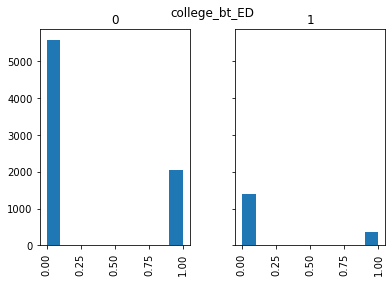

In [102]:
for i in prob_indices:
    X.hist(column = feature_list[i], by = 'prob', sharey = True)
    plt.suptitle(feature_list[i])
    filename = 'prob_' + feature_list[i] + '.png'
    plt.savefig(filename)

In [103]:
for i in gpa_indices:
    Xgpa.hist(column = feature_list[i], by = 'gpa', sharey = True, )
    plt.suptitle(feature_list[i])

Error in callback <function flush_figures at 0x000001B11898AB80> (for post_execute):


KeyboardInterrupt: 

## Slicing features from dataframes for models

In [4]:
disc_indices = [1,3,5,10,18,23,27,30,33,34,49,61,68,73,75,136,140,154,189]
#only feature to remove is the accidental index feature from disc
#also removed ACT because it was originally 69.4% NaN
#the rest seem okay to me, but I am not exactly sure what I am looking for to weed these out

Xd = X.iloc[:, [1,3,5,10,18,27,30,33,34,49,61,68,73,75,136,140,154,189]]
Xp = X.iloc[:, [1,6,7,9,10,14,15,16,18,19,25,33,49,67,93,117,133,139,187]]
Xg = Xgpa.iloc[:, [3,6,7,9,10,18,19,67,80,117,181,185,186,188,189,190,195]]



## OVERSAMPLING

Chose to use oversampling based on Rachel's research

In [5]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 64)
Xrd, yr_disc = ros.fit_resample(Xd, y_disc) #Xrd = X resampled disc
Xrp, yr_prob = ros.fit_resample(Xp, y_prob) #Xrp = X resampled prob

#don't need to oversample continuous gpa 

# MODELS

In [6]:
#nice imports
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor



from sklearn.model_selection import KFold #cross validation
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.metrics import mean_squared_error #RMSE calculations
from sklearn.metrics import get_scorer_names 

kf = KFold(n_splits = 5)

## DISCONTINUE

### Logistic Regression

In [8]:
logreg = LogisticRegression(solver = 'sag', max_iter = 200, random_state = 64) #documentation said sag was good for larger datasets

acc = cross_val_score(logreg, Xrd, yr_disc, cv=kf)
print("Accuracy: " , acc.mean()) 
recall = cross_val_score(logreg, Xrd, yr_disc, cv=kf, scoring='recall')
print('Recall: ', np.mean(recall), recall)
precision = cross_val_score(logreg, Xrd, yr_disc, cv=kf, scoring='precision')
print('Precision: ', np.mean(precision), precision)
f1 = cross_val_score(logreg, Xrd, yr_disc, cv=kf, scoring='f1')
print('F1: ', np.mean(f1), f1)

C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy:  0.381060012362813


C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Recall:  0.5843579147965954 [0.81520315 0.84316547 0.82482759 0.33692308 0.1016703 ]


C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Precision:  0.5388269358629062 [0.31131131 0.29183267 0.29751244 0.79347826 1.        ]


C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


F1:  0.3958050013838449 [0.45056139 0.4335923  0.43729433 0.47300216 0.18457482]


C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Neural Network

In [7]:
nn = MLPClassifier(solver = 'sgd', alpha = 1e-5, hidden_layer_sizes = (5,2), random_state = 64)

acc = cross_val_score(nn, Xrd, yr_disc, cv=kf)
print("Accuracy: " , acc.mean()) 
recall = cross_val_score(nn, Xrd, yr_disc, cv=kf, scoring='recall')
print('Recall: ', np.mean(recall), recall)
precision = cross_val_score(nn, Xrd, yr_disc, cv=kf, scoring='precision')
print('Precision: ', np.mean(precision), precision)
f1 = cross_val_score(nn, Xrd, yr_disc, cv=kf, scoring='f1')
print('F1: ', np.mean(f1), f1)

Accuracy:  0.23905968813552175
Recall:  0.6307741466957153 [1.         1.         1.         0.10666667 0.04720407]
Precision:  0.5310896069763764 [0.276951   0.2522686  0.26315789 0.86307054 1.        ]
F1:  0.3066709221313978 [0.43376919 0.40289855 0.41666667 0.18986764 0.09015257]


### SGD Classifier

In [15]:
sgd = SGDClassifier(alpha = 0.0001, tol = 0.001, random_state = 64)

acc = cross_val_score(sgd, Xrd, yr_disc, cv=kf)
print("Accuracy: " , acc.mean()) 
recall = cross_val_score(sgd, Xrd, yr_disc, cv=kf, scoring='recall')
print('Recall: ', np.mean(recall), recall)
precision = cross_val_score(sgd, Xrd, yr_disc, cv=kf, scoring='precision')
print('Precision: ', np.mean(precision), precision)
f1 = cross_val_score(sgd, Xrd, yr_disc, cv=kf, scoring='f1')
print('F1: ', np.mean(f1), f1)

Accuracy:  0.37263294966437205
Recall:  0.5771481982197788 [0.82044561 0.78705036 0.80551724 0.45384615 0.01888163]
Precision:  0.5311515304702636 [0.30716389 0.28549061 0.29420655 0.76889661 1.        ]
F1:  0.3809646273938861 [0.44698322 0.41899655 0.43099631 0.57078362 0.03706344]


### Random Forest Classifier

In [28]:
rfc = RandomForestClassifier(random_state=64, max_depth = 16 )

acc = cross_val_score(rfc, Xrd, yr_disc, cv=kf)
print("Accuracy: " , acc.mean()) 
recall = cross_val_score(rfc, Xrd, yr_disc, cv=kf, scoring='recall')
print('Recall: ', np.mean(recall), recall)
precision = cross_val_score(rfc, Xrd, yr_disc, cv=kf, scoring='precision')
print('Precision: ', np.mean(precision), precision)
f1 = cross_val_score(rfc, Xrd, yr_disc, cv=kf, scoring='f1')
print('F1: ', np.mean(f1), f1)

Accuracy:  0.7804565805619148
Recall:  0.8494260566602184 [0.86238532 0.88201439 0.88       0.83333333 0.78939724]
Precision:  0.7011172503433253 [0.55108878 0.50619323 0.5281457  0.92015855 1.        ]
F1:  0.7465410181171852 [0.67245784 0.6432319  0.66011381 0.87459634 0.88230519]


In [29]:
depths= np.arange(2,100,4)
f1_scores = np.array(0)
recall_scores = np.array(0)
for depth in depths:
    rfc = RandomForestClassifier(random_state = 64, max_depth = depth)
    f1_scores = np.append(f1_scores, np.mean(cross_val_score(rfc, Xrd, yr_disc, cv = kf, scoring = 'f1')))
    recall_scores = np.append(recall_scores, np.mean(cross_val_score(rfc, Xrd, yr_disc, cv = kf, scoring = 'recall')))


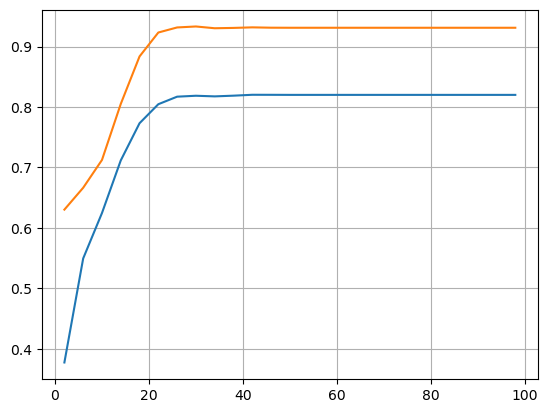

In [26]:
plt.plot(depths, f1_scores[1:], label = 'f1 score')
plt.plot(depths, recall_scores[1:], label = 'recall')
plt.grid(visible = True)

### KNN Classifier

In [17]:
knnc = KNeighborsClassifier()

acc = cross_val_score(knnc, Xrd, yr_disc, cv=kf)
print("Accuracy: " , acc.mean()) 
recall = cross_val_score(knnc, Xrd, yr_disc, cv=kf, scoring='recall')
print('Recall: ', np.mean(recall), recall)
precision = cross_val_score(knnc, Xrd, yr_disc, cv=kf, scoring='precision')
print('Precision: ', np.mean(precision), precision)
f1 = cross_val_score(knnc, Xrd, yr_disc, cv=kf, scoring='f1')
print('F1: ', np.mean(f1), f1)

Accuracy:  0.6531887490493946
Recall:  0.7513942853010244 [0.77457405 0.76978417 0.79862069 0.73897436 0.67501816]
Precision:  0.6046366235800176 [0.40286299 0.38078292 0.39684716 0.84269006 1.        ]
F1:  0.6326406436091616 [0.53004484 0.50952381 0.53021978 0.78743169 0.80598309]


### Gaussian Naive Bayes 

In [18]:
gnb = GaussianNB()
gnb.fit(Xrd, yr_disc)

#don't actually do this, this is sooo wrong
from sklearn.model_selection import train_test_splot
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, y_disc, test_size = 0.2)

#acc = cross_val_score(gnb, Xd, y_disc, cv=kf, n_jobs = 1)
#print("Accuracy: " , acc.mean()) 
#recall = cross_val_score(gnb, Xd, y_disc, cv=kf, scoring='recall')
#print('Recall: ', np.mean(recall), recall)
#precision = cross_val_score(gnb, Xd, y_disc, cv=kf, scoring='precision')
#print('Precision: ', np.mean(precision), precision)
#f1 = cross_val_score(gnb, Xd, y_disc, cv=kf, scoring='f1')
#print('F1: ', np.mean(f1), f1)

ImportError: cannot import name 'train_test_splot' from 'sklearn.model_selection' (C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\__init__.py)

## PROBATION

### Logistic Regression

In [19]:
logreg = LogisticRegression(solver = 'sag', max_iter = 200, random_state = 64) #documentation said sag was good for larger datasets
acc = cross_val_score(logreg, Xrp, yr_prob, cv=kf)
print("Accuracy: " , acc.mean()) 
recall = cross_val_score(logreg, Xrp, yr_prob, cv=kf, scoring='recall')
print('Recall: ', np.mean(recall), recall)
precision = cross_val_score(logreg, Xrp, yr_prob, cv=kf, scoring='precision')
print('Precision: ', np.mean(precision), precision)
f1 = cross_val_score(logreg, Xrp, yr_prob, cv=kf, scoring='f1')
print('F1: ', np.mean(f1), f1)

C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy:  0.7295883402289478


C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Recall:  0.7582057066838777 [0.81076389 0.86131387 0.79522184 0.67436975 0.64935919]


C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Precision:  0.6615238447663183 [0.44947064 0.42909091 0.44338725 0.98567042 1.        ]


C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


F1:  0.6617434612375104 [0.57832817 0.57281553 0.56933415 0.8008316  0.78740785]


C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Neural Network

In [22]:
nn = MLPClassifier(solver = 'sgd', alpha = 1e-5, hidden_layer_sizes = (5,2), random_state = 64, activation = 'relu')

acc = cross_val_score(nn, Xrp, yr_prob, cv=kf)
print("Accuracy: " , acc.mean()) 
recall = cross_val_score(nn, Xrp, yr_prob,  cv=kf, scoring='recall')
print('Recall: ', np.mean(recall), recall)
precision = cross_val_score(nn, Xrp, yr_prob,  cv=kf, scoring='precision')
print('Precision: ', np.mean(precision), precision)
f1 = cross_val_score(nn, Xrp, yr_prob,  cv=kf, scoring='f1')
print('F1: ', np.mean(f1), f1)

C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:  0.2417254999842382


C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Recall:  0.5738626837596352 [1.00000000e+00 8.68613139e-01 1.00000000e+00 7.00280112e-04
 0.00000000e+00]


C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.3613469119579501 [0.1892247  0.425      0.19250986 1.         0.        ]


C:\Users\Isabel\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


F1:  0.2426480086749483 [0.31823204 0.57074341 0.32286501 0.00139958 0.        ]


### SGD Classifier

In [23]:
sgd = SGDClassifier(alpha = 0.0001, tol = 0.001, random_state = 64)

acc = cross_val_score(sgd, Xrp, yr_prob, cv=kf)
print("Accuracy: " , acc.mean()) 
recall = cross_val_score(sgd, Xrp, yr_prob, cv=kf, scoring='recall')
print('Recall: ', np.mean(recall), recall)
precision = cross_val_score(sgd, Xrp, yr_prob, cv=kf, scoring='precision')
print('Precision: ', np.mean(precision), precision)
f1 = cross_val_score(sgd, Xrp, yr_prob, cv=kf, scoring='f1')
print('F1: ', np.mean(f1), f1)

Accuracy:  0.7253162403275348
Recall:  0.750565298615353 [0.78298611 0.79379562 0.87201365 0.69607843 0.60795268]
Precision:  0.6619612278341153 [0.45190381 0.44891641 0.42336371 0.98562221 1.        ]
F1:  0.6577327594383852 [0.57306226 0.57350033 0.56999442 0.81592448 0.7561823 ]


### Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(random_state=64)

acc = cross_val_score(rfc, Xrp, yr_prob, cv=kf)
print("Accuracy: " , acc.mean()) 
recall = cross_val_score(rfc, Xrp, yr_prob, cv=kf, scoring='recall')
print('Recall: ', np.mean(recall), recall)
precision = cross_val_score(rfc, Xrp, yr_prob, cv=kf, scoring='precision')
print('Precision: ', np.mean(precision), precision)
f1 = cross_val_score(rfc, Xrp, yr_prob, cv=kf, scoring='f1')
print('F1: ', np.mean(f1), f1)

Accuracy:  0.951773614547163
Recall:  0.9922961058795524 [0.97743056 0.99087591 0.99317406 1.         1.        ]
Precision:  0.8238057975921705 [0.71628499 0.68387909 0.72478207 0.99408284 1.        ]
F1:  0.8942021888236468 [0.8267254  0.80923994 0.83801296 0.99703264 1.        ]


### KNN Classifier

In [25]:
knnc = KNeighborsClassifier()

acc = cross_val_score(knnc, Xrp, yr_prob, cv=kf)
print("Accuracy: " , acc.mean()) 
recall = cross_val_score(knnc, Xrp, yr_prob, cv=kf, scoring='recall')
print('Recall: ', np.mean(recall), recall)
precision = cross_val_score(knnc, Xrp, yr_prob, cv=kf, scoring='precision')
print('Precision: ', np.mean(precision), precision)
f1 = cross_val_score(knnc, Xrp, yr_prob, cv=kf, scoring='f1')
print('F1: ', np.mean(f1), f1)

Accuracy:  0.8246893950614991
Recall:  0.9186128685678705 [0.93576389 0.93613139 0.94368601 0.8977591  0.87972396]
Precision:  0.6743610492513143 [0.46226415 0.45118734 0.47144075 0.98691301 1.        ]
F1:  0.7465477392019917 [0.61882893 0.60890208 0.62876634 0.94022736 0.93601399]


### Gaussian Naive Bayes

## SEMESTER GPA

### SVM (SVR)

In [26]:
svm = SVR()

rmse = cross_val_score(svm, Xg, y_gpa, cv=kf, scoring = 'neg_root_mean_squared_error')
print("RMSE: " , -1*rmse.mean(), -1*rmse)

RMSE:  -0.6535851869274134 [-0.67157777 -0.64057299 -0.64253246 -0.6615125  -0.65173022]


### SGD Regression

In [27]:
sgdR = SGDRegressor(max_iter = 1000, tol = 0.001, alpha = 0.0001, random_state = 64)

rmse = cross_val_score(sgdR, Xg, y_gpa, cv=kf, scoring = 'neg_root_mean_squared_error')
print("RMSE: " , -1*rmse.mean(), -1*rmse)

RMSE:  -0.6727115649205366 [-0.68671563 -0.67132178 -0.66841917 -0.66439614 -0.67270509]


### KNN Regression

In [28]:
knnr = KNeighborsRegressor() #n_neighbors = 5 default

rmse = cross_val_score(knnr, Xg, y_gpa, cv=kf, scoring = 'neg_root_mean_squared_error')
print("RMSE: " , -1*rmse.mean(), -1*rmse)

RMSE:  -0.7079816531344989 [-0.72518955 -0.70098248 -0.70831136 -0.70367474 -0.70175013]


### Random Forest Regression

In [33]:
rfr = RandomForestRegressor()

rmse = cross_val_score(rfr, Xg, y_gpa, cv=kf, scoring = 'neg_root_mean_squared_error')
print("RMSE: " , -1*rmse.mean(), -1*rmse)

RMSE:  0.6514250883071548 [0.67439943 0.63558652 0.64709134 0.64796926 0.65207888]


### Neural Network Regression

In [32]:
nnr = MLPRegressor(solver = 'sgd', alpha = 1e-5, hidden_layer_sizes = (10,2), random_state = 64, activation = 'relu')
#default hidden layer size is (100,)
#tried increasing/decreasing the dimensions to get better rmse
#this was the best I could come up with for hidden layer size
rmse = cross_val_score(nnr, Xg, y_gpa, cv=kf, scoring = 'neg_root_mean_squared_error')
print("RMSE: " , -1*rmse.mean(), -1*rmse)

RMSE:  -0.6584504232116654 [-0.68082863 -0.66381821 -0.64435197 -0.64862493 -0.65462838]
